In [1]:
## Important libraries
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection  import train_test_split 
from sklearn import metrics 
from sklearn.model_selection  import cross_val_score 
dta =  sm.datasets.fair.load_pandas().data
#add "affair" column: 1 represents having affairs, 0  represents not 
dta['affair'] = (dta.affairs >  0).astype(int) 


C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, us

In [2]:
## dummy the occupation
y, X = dmatrices('affair ~ rate_marriage + age +  yrs_married + children + religious + educ +  C(occupation) + C(occupation_husb)', dta, return_type="dataframe") 
X = X.rename(columns =  
{'C(occupation)[T.2.0]':'occ_2', 
'C(occupation)[T.3.0]':'occ_3', 
'C(occupation)[T.4.0]':'occ_4', 
'C(occupation)[T.5.0]':'occ_5', 
'C(occupation)[T.6.0]':'occ_6', 
'C(occupation_husb)[T.2.0]':'occ_husb_2', 
'C(occupation_husb)[T.3.0]':'occ_husb_3', 
'C(occupation_husb)[T.4.0]':'occ_husb_4', 
'C(occupation_husb)[T.5.0]':'occ_husb_5', 
'C(occupation_husb)[T.6.0]':'occ_husb_6'}) 
y = np.ravel(y) 

In [3]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [4]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [5]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [6]:
## Importing libraries used for classification
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

<AxesSubplot:>

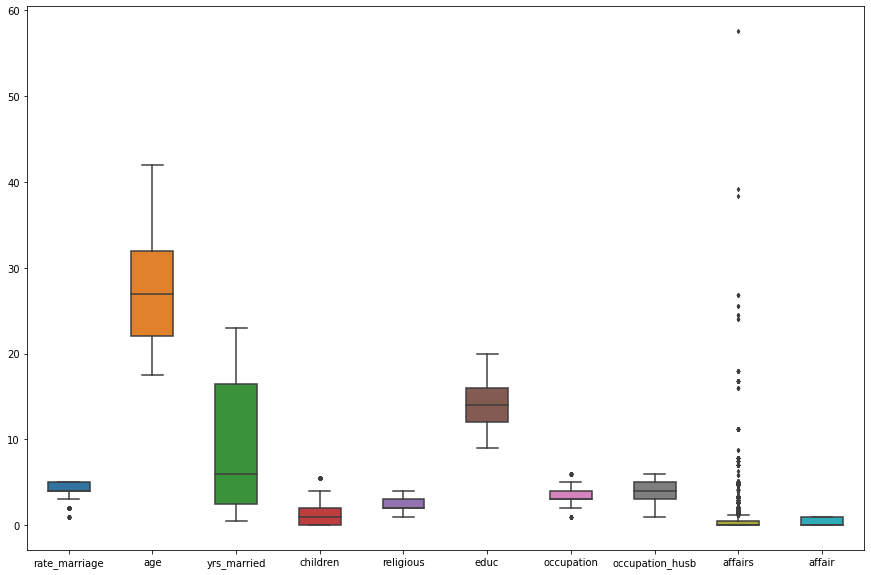

In [7]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dta, width= 0.5,ax=ax,  fliersize=3)

In [8]:
## splittig the train test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
X_tra

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
1258,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,22.0,6.0,1.0,3.0,14.0
2228,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,22.0,2.5,0.0,3.0,16.0
4011,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,27.0,6.0,0.0,2.0,17.0
95,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,27.0,9.0,2.0,2.0,14.0
2640,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,22.0,6.0,2.0,3.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,32.0,6.0,0.0,1.0,14.0
5191,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,0.5,0.0,2.0,16.0
5226,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,27.0,2.5,0.0,1.0,17.0
5390,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,32.0,13.0,1.0,3.0,16.0


In [12]:
## using Random forest classifier
from  sklearn.ensemble import RandomForestClassifier
forestclf = RandomForestClassifier(random_state=42)
# cross validation
cross_val_score(forestclf,X_train,y_train,cv=3,scoring='accuracy')

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32`

array([0.66890983, 0.68573351, 0.67385445])

In [13]:
# Logisitc regression
lr =LogisticRegression(penalty='l1')
cross_val_score(lr,X_train,y_train,cv=3,scoring='accuracy')

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32`

array([0.72409152, 0.72072678, 0.72708895])

In [15]:
# proceed with logistic regression
# making prediction
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [17]:
#confusion matrix
confusion_matrix(y_test,y_test_pred)

array([[1141,  134],
       [ 391,  244]], dtype=int64)

In [18]:
# precision score, recall and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))
print(f1_score(y_test,y_test_pred))

0.6455026455026455
0.384251968503937
0.48173741362290223


In [19]:
# precision recall curve
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_test,y_test_pred)

In [23]:
precisions,recalls,thresholds

(array([0.33246073, 0.64550265, 1.        ]),
 array([1.        , 0.38425197, 0.        ]),
 array([0., 1.]))

In [24]:
#ROC curve
fpr,tpr,thresholds =roc_curve(y_test,y_test_pred)

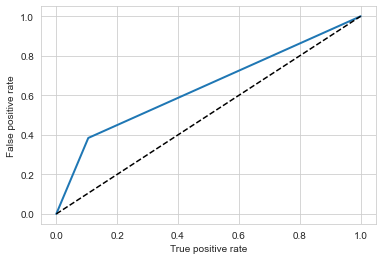

In [27]:
sns.set_style('whitegrid')
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.xlabel('True positive rate')
    plt.ylabel('False positive rate')
plot_roc_curve(fpr,tpr)